In [591]:
import pandas as pd
import csv
import numpy as np
import math
import time
from sklearn import preprocessing

<img src="alg1.png" width = "400" height = "200" />

Algorithm 1 Implementation - Pass in two matrices you want to multiply together (A and B), and an empty matrix (C). Set the matrix dimensions as p,q,and r. Populate the empty matrix C by multiplying the corresponding rows and columns in A and B. Return the populated matrix C.

In [763]:
def alg1(A,B,C):
    p = len(A)
    q = len(A[0])
    r = len(B[0]) 
    for i in range(0, p):
        for j in range(0, r):
            sum = 0
            for k in range(0, q):
                sum = sum + A[i,k] * B[k,j]
            C[i,j] = sum
    return C
            


<img src="alg2.png" width = "400" height = "200" />

Algorithm 2 Implementation - Pass in two matrices that you want to multiplty (A and B), an empty matrix C, and a tile size which is set to 5 at default. Get p, q, and r as the dimensions of A and B. Iterate through A and B using the tile size to populate the empty matrix C and return C.

In [4]:
def alg2(A,B,C, T = 5):
    p = len(A)
    q = len(A[0])
    r = len(B[0]) 
    for I in range(0, p, T):
        for J in range(0,r, T):
            for K in range(0,q, T):
                for i in range(I, min(I+T, p)):
                    for j in range(J, min(J+T, r)):
                        sum = 0
                        for k in range(K, min(K+T, q)):
                            sum = sum + A[i,k] * B[k,j]
                        C[i,j] = sum
    return C

<img src="alg3.png" width = "400" height = "250" />

Algorithm 3 Implementation - Pass in two matrices we want to multiplty (A and B), and an empty matrix C that we want to populate. If the dimensions are less than 8, use algorithm 1. 
If the largest dimension is p, which is the number of rows in A, so we split A horizontally. We then recursively pass in the two halves of A and B into alg3 and multiply them to populate C. 
Else if the largest dimemsion is the number of columns in B, split B vertically. Then, recursively pass in the two halves of B and A back into alg3 and populate C that way.
Else, split A vertically and split B horizontally. Populate C by recursively multiplying the corresponding halves of A and B and add them together. 
Return the populated matrix C.

In [6]:
def alg3(A, B, C):
    p = len(A)
    q = len(A[0])
    r = len(B[0]) 


    if max(p,q,r) < 8:
        alg1(A,B,C)
    else:
        if (max(p,q,r) == p):
            split = p//2
            A1 = A[:split, :]
            A2 = A[split:, :]
            C[:split,:] = alg3(A1, B, np.empty((split,r)))
            C[split:, :] = alg3(A2, B, np.empty((p-split, r)))

        elif(max(p,q,r) ==r):
            split = r//2
            B1 = B[:, :split]
            B2 = B[:, split:]
            C[:, :split] = alg3(A, B1, np.empty((p,split)))
            C[:, split:] = alg3(A, B2, np.empty((p, r-split)))

        else:
            split = q//2
            A11 = A[:, :split]
            A22 = A[:, split:]
            B11 = B[:split,:]
            B22 = B[split:,:]
            C = alg3(A11, B11, np.empty((p,r))) + alg3(A22, B22, np.empty((p, r)))

    return C

Defining a function to split a matrix into four quadrants. This function is used in algorithm 4 and 5. It takes the dimensions of the current matrix passed in, divides it by two, and returns the four resulting matrices. 

In [8]:
def spl(matrix):
    row,col = matrix.shape
    row2, col2 = row//2, col//2
    return matrix[:row2, :col2], matrix[:row2, col2:], matrix[row2:, :col2], matrix[row2:, col2:]

Defining a function to check if the dimensions of a matrix is a power of 2 and if the matrix is a square, to see if they can be run with certain algorithms. This function is used at the begininning of algorithm 4 and 5, since the matrix must be a square to be used in this algorithm. A matrix is passed into the function and the row dimension is first checked to see if it is a power of two. Then the column is all checked to see if it is a power of two. Lastly, it is checked to see if the row and column values are equal to each other. 

In [533]:
def isSquare(matrix):
    return (math.ceil(math.log2(matrix.shape[0])) == math.floor(math.log2(matrix.shape[0]))
            and math.ceil(math.log2(matrix.shape[1])) == math.floor(math.log2(matrix.shape[1]))
            and matrix.shape[0] == matrix.shape[1])

<img src="alg4.png" width = "400" height = "300" />

First check if the dimensions are a power of 2 by using the isSquare function previously defined. Then, set n to be one of the dimensions of A. (we don't have to differentiate between p, q, and r like previously because it's a square so all the dimensions will be the same). Our base case is if the dimensions are 1, in which case we multiple A and B. Else split A and B into four different quadrants. Populate the different quadrants of C by recursively multiplying and adding the different quadrants of A and B. Return the populated matrix C. 

In [709]:
def alg4(A, B, C):
    if(not isSquare(A) or not isSquare(B) or not isSquare(C)):
       return "Matrix dimensions must be power of 2 or must be square matrices"
    n = A.shape[0]
    if n ==1:
        C[0,0] = A[0,0]*B[0,0]
        return C

    
    else:
        split = n//2
        A11, A12, A21, A22 = spl(A)
        B11, B12, B21, B22 = spl(B)

        
        C[:split, :split] = alg4(A11, B11, np.empty((split,split))) + alg4(A12, B21, np.zeros((split,split)))
        C[:split, split:] = alg4(A11, B12, np.empty((split,split))) + alg4(A12, B22, np.zeros((split,split)))
        C[split:, :split] = alg4(A21, B11, np.empty((split,split))) + alg4(A22, B21, np.zeros((split,split)))
        C[split:, split:] = alg4(A21, B12, np.empty((split,split))) + alg4(A22, B22, np.zeros((split,split)))
    return C
        

In [713]:
a = np.random.rand(2**9,2**9)
b = np.random.rand(2**9,2**9)
c = np.zeros((2**9,2**9))

alg4(a,b,c)

array([[129.87789382, 133.3638491 , 127.84369841, ..., 126.37703494,
        130.14046467, 128.68891066],
       [132.82825616, 131.7965511 , 126.96975769, ..., 124.52482634,
        132.35423819, 128.84831416],
       [127.48095791, 126.62901118, 124.94414089, ..., 121.19951731,
        126.49546605, 123.75268618],
       ...,
       [128.51717365, 126.83765819, 130.35512609, ..., 121.52546402,
        131.28215249, 129.15743421],
       [126.31232562, 128.28643321, 124.33263501, ..., 120.20728697,
        127.76567117, 122.13596918],
       [130.63659955, 127.56388384, 125.54396277, ..., 124.93039073,
        129.9157562 , 127.00468293]])

<img src="alg5.png" width = "400" height = "400" />

Pass in two matrices you want to multiply (A and B), and an empty matrix C that we want to populate. Check the dimensions of A, B, and C to make sure it is a power of 2 by using the isSquare function previously defined. Set n as the dimensions of A (since A and B are square, the dimensions are all the same and can be represented by a single variable n). If n is less than 3, use algorithm 1 to populate C. Else, split A and B into four quadrants. Perform the necessary additions, subtractions, and multiplications and recursively calling alg5 as specified in the pseudocode. Populate the quadrants of C using the results from these calculations. Return the populated matrix C. 

In [757]:
def alg5(A, B, C):
    if(not isSquare(A) or not isSquare(B) or not isSquare(C)):
       return "Matrix dimensions must be power of 2 or must be square matrices"
    n = A.shape[0]
     
    if n < 8:
        alg1(A,B,C)
        return C
    
    else:
        split = n//2
        A11, A12, A21, A22 = spl(A)
        B11, B12, B21, B22 = spl(B)

        M1 = alg5(A11+A22, B11+B22,np.zeros((split,split)))
        M2 = alg5(A21+A22, B11, np.zeros((split,split)))
        M3 = alg5(A11, B12-B22, np.zeros((split,split)))
        M4 = alg5(A22, B21-B11, np.zeros((split,split)))
        M5 = alg5(A11+A12, B22, np.zeros((split,split)))
        M6 = alg5(A21-A11, B11+B12, np.zeros((split,split)))
        M7 = alg5(A12-A22, B21+B22, np.zeros((split,split)))
        
        C[:split, :split] = M1 + M4 - M5 + M7
        C[:split, split:] = M3 + M5
        C[split:, :split] = M2 + M4
        C[split:, split:] = M1 - M2 + M3 + M6
    return C

3. Matrix Multiplication Problem

Two empty arrays a and b are created. A 4 by 4 array, c, is also created and populated with zeros. The file called input.txt is opened and two lines are generated, separated by a semicolon: this will differentiate between the values used to populate a and b. For each number in the first line, it is appended to the array a previously created, with each value separated by a comma. For each number in the second line, it is appended to array b, with each value separated by a comma as well. With a and b both fully populated, they are both reshaped to create the shape of a 4 by 4 matrice. Then, algorithm 1, algorithm 2, algorithm 3, algorithm 4, and algorithm 5 is used to carry the result of the matrix multiplication done between matrix a and b. The resultant matrix is printed as specified in the instructions.

In [691]:
a = []
b = []
c = np.zeros((4,4))
with open("input.txt") as myfile:

    for line in myfile:
        line = line.split(";")
        for num in line[0].split(','):
            a.append(int(num))
        for num in line[1].split(','):
            b.append(int(num))
a = np.reshape(a, (4,4))
b = np.reshape(b, (4,4))

print("\nAlgorithm-1:\n", alg1(a,b,c))

print("\nAlgorithm-2:\n", alg2(a,b,c))

print("\nAlgorithm-3:\n", alg3(a,b,c))

print("\nAlgorithm-4:\n", alg4(a,b,c))

print("\nAlgorithm-5:\n", alg5(a,b,c))



Algorithm-1:
 [[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]

Algorithm-2:
 [[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]

Algorithm-3:
 [[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]

Algorithm-4:
 [[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]

Algorithm-5:
 [[ 90. 100. 110. 120.]
 [202. 228. 254. 280.]
 [314. 356. 398. 440.]
 [426. 484. 542. 600.]]


3b - Experiment I.
Create a dataframe with columns for the input size, alg1 time, alg2 time, and alg3 times. The index is set to the column for input size. Create a for loop where i ranges from 10 to 300, incrementing by ten each time. The input size will create square matrices of this size, using random values between 0 and 1 for each value in the matrix. For each iteration of the loop, we get the time before the algorithm, run the algorithm, and get the time when the algorithm finishes. By subtracting the start time from the end time, we get the time that it takes to run the algorithm. We do this process for each algorithm: algorithm 1, algorithm 2, and algorithm 3. After we run each algorithm, we add a row to our dataframe, with the input size as the index, and adding the time it took for each algorithm it took. Then, the for loop iterates again and updates the size of the input, and this continues until the process is completed for a matrix of size 300.

In [592]:
df = pd.DataFrame(columns = ['Input Size', 'Alg1 Time', 'Alg2 Time', 'Alg3 Time'])
df = df.set_index('Input Size')
for i in range(10,301,10):
    a = np.random.rand(i,i)
    b = np.random.rand(i,i)
    c = np.zeros((i,i))

    start = time.perf_counter()
    alg1(a,b,c)
    end = time.perf_counter()
    alg1t = end - start

    start2 = time.perf_counter()
    alg2(a,b,c)
    end2 = time.perf_counter()
    alg2t = end2 - start2

    start3 = time.perf_counter()
    alg3(a,b,c)
    end3 = time.perf_counter()
    alg3t = end3 - start3

    df.loc[i] = [alg1t, alg2t, alg3t]


Create an array (later to be added as a column to the dataframe with empirical values) for the theoretical time complexities for algorithm1. Using the T(n) I calculated on paper, fill the n with the input sizes used above (10 to 300, incrementing by 10 each time). Then, I scaled all these values so it would be comparable to the observed values by dividing by 10^k, choosing k by seeing which value would bring the values into similar ranges as the empirical values. 

In [583]:
alg1theo = []
for i in range(10,301,10):
    time = 13*(i**3) + 6*(i**2)+ 2*i + 10
    time = time/10000000
    alg1theo.append(time)
alg1theo = np.array(alg1theo).reshape(-1,1)

Repeating the same process as above but for algorithm 2. 

In [668]:
alg2theo = []
for i in range(10,301,10):
    time = (13/125)*(i**6) + (10/25)*(i**5) + (2/125)*(i**4)+ (2/125)*(i**3) + (2/25)*(i**2) + (2/5)*i + 9
    time = time/1000000000000
    alg2theo.append(time)
alg2theo = np.array(alg2theo).reshape(-1,1)

Repeat the process for algorithm 3. (Note: I used Master's method to calculate the big-Oh time complexity.)

In [675]:
alg3theo = []
for i in range(10,301,10):
    time = (i**3)/1000000
    alg3theo.append(time)
alg3theo = np.array(alg3theo).reshape(-1,1)


Add these theoretical values to the previously created data frame. 

In [676]:
df["Alg1Theoretical"] = alg1theo
df["Alg2Theoretical"] = alg2theo
df["Alg3Theoretical"] = alg3theo

View the full dataframe.

In [677]:
df

,Alg1 Time,Alg2 Time,Alg3 Time,Alg1Theoretical,Alg2Theoretical,Alg3Theoretical
Input Size,,,,,,
10,0.002297,0.004905,0.005502,0.001363,1.441970e-07,0.001
20,0.014477,0.026421,0.045945,0.010645,7.938737e-06,0.008
30,0.042439,0.036246,0.042932,0.035647,8.554949e-05,0.027
40,0.059420,0.082287,0.081223,0.084169,4.669861e-04,0.064
50,0.115110,0.160778,0.155485,0.164011,1.750102e-03,0.125
60,0.200236,0.281365,0.289130,0.282973,5.163475e-03,0.216
70,0.361594,0.448612,0.487409,0.448855,1.290817e-02,0.343
80,0.472117,0.671128,0.696180,0.669457,2.857436e-02,0.512
90,0.674271,0.947046,0.914448,0.952579,5.763289e-02,0.729


Import a package to plot the empirical and theoretical complexities.

In [21]:
import matplotlib.pyplot as plt

Plot each of the time taken as a function of the input size. All empirical values are drawn with solid lines and all theoretical values are drawn with dashed lines. A legend is included to show which color corresponds with which algorithm.

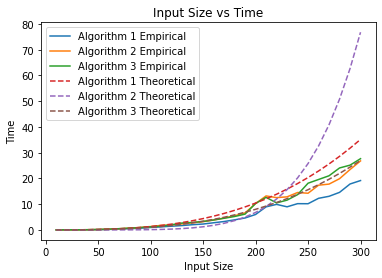

In [671]:
plt.plot(df.index, df["Alg1 Time"], label = "Algorithm 1 Empirical")
plt.plot(df.index, df["Alg2 Time"], label = "Algorithm 2 Empirical")
plt.plot(df.index, df["Alg3 Time"], label = "Algorithm 3 Empirical")
plt.plot(df.index,df["Alg1Theoretical"],label = "Algorithm 1 Theoretical", linestyle = '--')
plt.plot(df.index, df["Alg2Theoretical"], label = "Algorithm 2 Theoretical", linestyle = "--")
plt.plot(df.index, df["Alg3Theoretical"], label = "Algorithm 3 Theoretical", linestyle = "--")
plt.xlabel("Input Size")
plt.ylabel("Time")
plt.title("Input Size vs Time")
plt.legend()
plt.show()

3c - Experiment II:
A dataframe is created using input size, algorithm 1, algorithm 3, algorithm 4, and algorithm 5 as the column names, and the index is set to input size. A for loop is created in which i ranges from 0 to 9 inclusively, and matrices a and b are generated using 2 to the power of i. This ensures that the matrices created are square. Once a and b and created and populated using random numbers from 0 to 1, c is also created with the same dimensions but populated with zeros. The time is taken before the algorithm is called, the algorithm is ran, and the time is taken after, and this process is repeated for each of the algorithms. The time taken can be calculated by subtracting the start time from the end time. Then these values are all inputted into the dataframe, using the input size as the index. 


In [ ]:
from time import perf_counter
df2 = pd.DataFrame(columns = ['Input Size', 'Alg1 Time', 'Alg3 Time', 'Alg4 Time', 'Alg5 Time'])
df2 = df2.set_index('Input Size')
for i in range(0,10):
    a = np.random.rand(2**i,2**i)
    b = np.random.rand(2**i,2**i)
    c = np.zeros((2**i,2**i))

    start = perf_counter()
    alg1(a,b,c)
    end = perf_counter()
    alg1t = end - start

    start3 = perf_counter()
    alg3(a,b,c)
    end3 = perf_counter()
    alg3t = end3 - start3

    start4 = perf_counter()
    alg4(a,b,c)
    end4 = perf_counter()
    alg4t = end4 - start4

    start5 = perf_counter()
    alg5(a,b,c)
    end5 = perf_counter()
    alg5t = end5 - start5


    df2.loc[2**i] = [alg1t, alg3t, alg4t, alg5t]

3c - Experiment II: A dataframe is created with the index set to input size. First, we calculate the run time for algorithm 1, using dimension sizes of 2^i where 0 <= i <= 9. Two matrices, a and b, are creating using this dimension size and populated with random real numbers from 0 to 1. A matrix, c, is also created with the same dimensions but populated with zeros. Perf_counter() is used to capture the time before we run alg1, alg1 is called with a, b, and c passed in as arguments, and Perf_counter() is used again to capture the end time. The start time is then subtracted from the end time to calculate the total time it took to run the algorithm, and this value is stored into the dataframe with the corresponding input size. 

Note: this is not the most efficient way to create this dataframe. However, after several trial and errors, I found that running each algorithm separately and appending them to the dataframe was the only way to keep the code from running with no end. Ideally, only one for loop would be required and you should be able to run and calculate each of the algorithm run times, appending them to the dataframe in a single loop. 

In [768]:
df2 = pd.DataFrame(columns = ['Input Size', 'Alg1 Time'])
df2 = df2.set_index('Input Size')

for i in range(0,10):
    a = np.random.rand(2**i,2**i)
    b = np.random.rand(2**i,2**i)
    c = np.zeros((2**i,2**i))

    start = perf_counter()
    alg1(a,b,c)
    end = perf_counter()
    tot = end-start

    df2.loc[2**i] = [tot]


The process above was repeated for algorithm 3. An array was first created to store all the run times for the different matrix dimensions. Then it loops through different dimensions of size 2^i, with i ranging from 0 to 9, inclusively. The same methodology is used to calculate the run time for alg3. Then this time is appended to the array. After the loop, the array is then reshaped so it can be added to our dataframe from above. 

In [770]:
alg3times = []
for i in range(0,10):
    a = np.random.rand(2**i,2**i)
    b = np.random.rand(2**i,2**i)
    c = np.zeros((2**i,2**i))

    start = perf_counter()
    alg3(a,b,c)
    end = perf_counter()
    tot = end-start

    alg3times.append(tot)
alg3times = np.array(alg3times).reshape(-1,1)
df2["Alg3 Time"] = alg3times


The same process as above is repeated for algorithm 4. 

In [772]:
alg4times = []
for i in range(0,10):
    a = np.random.rand(2**i,2**i)
    b = np.random.rand(2**i,2**i)
    c = np.zeros((2**i,2**i))

    start = perf_counter()
    alg4(a,b,c)
    end = perf_counter()
    tot = end-start

    alg4times.append(tot)
alg4times = np.array(alg4times).reshape(-1,1)
df2["Alg4 Time"] = alg4times

The same process is repeated for algorithm5. 

In [773]:
alg5times = []
for i in range(0,10):
    a = np.random.rand(2**i,2**i)
    b = np.random.rand(2**i,2**i)
    c = np.zeros((2**i,2**i))

    start = perf_counter()
    alg5(a,b,c)
    end = perf_counter()
    tot = end-start

    alg5times.append(tot)
alg5times = np.array(alg5times).reshape(-1,1)
df2["Alg5 Time"] = alg5times

Create the theoretical time complexities based on the input size for algorithm one using the same methodology as before. The equation T(n) is as shown in the pdf, and the input size is calculated using 2^i, wich 0 <= i <= 9. The time taken is then scaled by diving by 10^k, where k is a constant used to bring the time into similar ranges through trial and error. 

In [780]:
alg1theo = []
for i in range(0,10):
    s = 2**i
    time = 13*(s**3) + 6*(s**2)+ 2*s + 10
    time = time/10000000
    alg1theo.append(time)
alg1theo = np.array(alg1theo).reshape(-1,1)

Repeat the process for algorithm 3 theoretical time complexity. 

In [779]:
alg3theo = []
for i in range(0,10):
    s = 2**i
    time = (s**3)/1000000
    alg3theo.append(time)
alg3theo = np.array(alg3theo).reshape(-1,1)


Repeat the process for algorithm 4 complexity. 

In [784]:
alg4theo = []
for i in range(0,10):
    s = 2**i
    time = (s**3)/1000000
    alg4theo.append(time)
alg4theo = np.array(alg4theo).reshape(-1,1)

Repeat the process for algorithm 5 complexity. 

In [788]:
alg5theo = []
for i in range(0,10):
    s = 2**i
    time = (s**2.8)/1000000
    alg5theo.append(time)
alg5theo = np.array(alg5theo).reshape(-1,1)

Add these theoretical complexities into the same dataframe.

In [785]:
df2["Alg1Theoretical Time"] = alg1theo
df2["Alg3Theoretical Time"] = alg3theo
df2["Alg4Theoretical Time"] = alg4theo
df2["Alg5Theoretical Time"] = alg5theo

View the dataframe.

In [786]:
df2

,Alg1 Time,Alg3 Time,Alg4 Time,Alg5 Time,Alg1Theoretical Time,Alg3Theoretical Time,Alg4Theoretical Time,Alg5Theoretical Time
Input Size,,,,,,,,
1,0.000013,0.001174,0.000736,0.002344,0.000003,0.000001,0.000001,0.000001
2,0.000024,0.000031,0.000398,0.000019,0.000014,0.000008,0.000008,0.000007
4,0.000074,0.000113,0.001611,0.000049,0.000095,0.000064,0.000064,0.000049
8,0.000335,0.001280,0.011838,0.001834,0.000707,0.000512,0.000512,0.000338
16,0.002968,0.007830,0.074830,0.003188,0.005483,0.004096,0.004096,0.002353
32,0.036516,0.055617,0.422243,0.021316,0.043220,0.032768,0.032768,0.016384
64,0.254252,0.305307,3.397970,0.144845,0.343259,0.262144,0.262144,0.114105
128,1.179318,2.296945,25.268146,0.891848,2.736155,2.097152,2.097152,0.794672
256,9.144553,17.460472,178.866728,6.357739,21.849755,16.777216,16.777216,5.534417


Plot the time eomplexities as a function of input size. All the empirical (or observed) complexities are shown with a solid line. All theoretical complexities are displayed with a dotted line. A legend is shown in the left corner to be able to denote which line corresponds to which time complexity. Along the x axis, we have the input size. Along the y axis, we have the time taken. 

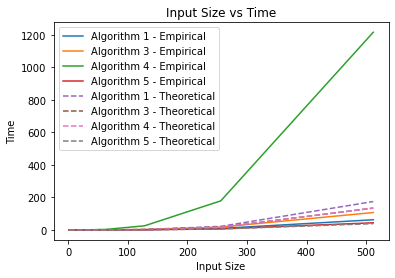

In [787]:
plt.plot(df2.index, df2["Alg1 Time"], label = "Algorithm 1 - Empirical")
plt.plot(df2.index, df2["Alg3 Time"], label = "Algorithm 3 - Empirical")
plt.plot(df2.index, df2["Alg4 Time"], label = "Algorithm 4 - Empirical")
plt.plot(df2.index, df2["Alg5 Time"], label = "Algorithm 5 - Empirical")
plt.plot(df2.index, df2["Alg1Theoretical Time"], label = "Algorithm 1 - Theoretical", linestyle = '--')
plt.plot(df2.index, df2["Alg3Theoretical Time"], label = "Algorithm 3 - Theoretical", linestyle = '--')
plt.plot(df2.index, df2["Alg4Theoretical Time"], label = "Algorithm 4 - Theoretical", linestyle = '--')
plt.plot(df2.index, df2["Alg5Theoretical Time"], label = "Algorithm 5 - Theoretical", linestyle = '--')
plt.xlabel("Input Size")
plt.ylabel("Time")
plt.title("Input Size vs Time")
plt.legend()
plt.show()

Matrix Chain Multiplication Problem:

<img src="matrix_chain_order.png" width = "400" height = "300" />

Import a package that allows us to replicate the infinity as shown in the pseudocode above.

In [29]:
import sys

Implement the matrix_chain_order as shown above in the excerpt from the textbook. The parameters p and n are passed in, with p representing the dimensions for each of the matrices in the matrix chain, and n is the number of matrices in the matrix chain. Two matrices are created, m and s, and populated initially with zeros. The m matrix is to represent the "cost" or number of multiplications it requires when multiplying in this specific sequence. The s matrix is to represent the value of k, or the split, that allowed us to minimize this cost. All the values in m along the diagonal are initalized to 0, since the cost is zero when multiplying a matrix by itself. Another for loop is generated, l which represents the length of the matrix chains whose minimum costs are being computed. An inner loop, i iterates over the range of starting indices. And j represents the ending index of the subchain. m[i][j] is initially set to maxsize, acting as a placeholder for the minimum cost, since amy cost we compute will be less than the maxsize. The cost is then computed for different k values which represent the split points, and if the cost is less than the current cost for that spot in m, then it replaces it. The corresponding value in s is updated with the k (or split point) value that allowed us to achieve this minimum cost.
Note: Some of the indices were modified to ensure they would work with python since it indexes beginning at 0.

In [209]:
def matrix_chain_order(p,n):
    m = np.zeros((n,n))
    s = np.zeros((n,n))
 
    for i in range(n):
        m[i][i] = 0
    #l denotes the length of matrix chains whose minimum costs are being computed
    for l in range(2,n+1):
        for i in range(n-l+1):
            j = i+l-1
            m[i][j] = sys.maxsize
            for k in range(i, j):
                q = m[i][k] + m[k+1][j] + (p[i]*p[k+1]*p[j+1])
                if q < m[i][j]:
                    m[i][j] = q
                    s[i][j] = k+1


    return m,s



Develop a function to generate all the matrix chains. First generate all the dimensions for each matrix in each matrix chain. I chose to store this information in a two-dimensional array called p, with rows representing the i-th matrix chain, and columns representing the j-th matrix within each matrix chain. Then, I populated p, generating the bounds for each position, with 10 being the lowerbound and i*10 being the upperbound. (As per the assignment instructions, since j must be from 2 to 20, I adjusted my variables accordingly since python is indexed starting from 0). Then I used this information to create the chain of matrices. Starting with each matrix chain, we generate a chain and loop through, creating matrices using the values in p to create the row and column values. (Note that rows is accessed using p[i][j] and columns is accessed using p[i][j+1], this is to ensure that you are able to multiply matrices that are next to each other). Once row and column dimensions are determined, we generate the matrix, using random.rand to generate a number between 0 and 1. Then we append this to our chain, and do this ten times so that each chain contains ten matrices. Once this is completed, we move to the next chain of matrices in the matrix chain. Finally, we return p and the matrix_chain. 

In [493]:
def generate_matrix_chain():

    #create the dimensions
    p = np.zeros((19,11))
    for i in range(len(p)): #for each row
        for j in range(len(p[i])): #for each column in that row
            p[i][j] = np.random.randint(10,(i+2)*10 + 1)

    #create the matrices
    matrix_chain = []

    for i in range(19):
        chain = []
        for j in range(10):
            rows = int(p[i][j])
            cols = int(p[i][j+1])
            matrix = np.random.rand(rows,cols)
            chain.append(matrix)
        matrix_chain.append(chain)
    return p, matrix_chain
            

Generate a function that multiplies the matrices sequentially, with a parameter for the matrix chain. Inititially create a variable named result and initialize it to the first matrix in the matric chain. Then loop through the rest of the matrix chain using alg1, inputting the current result as the first matrix, the next matrix in the loop as the second input, and the third input is an empty array to be filled out and returned using those two inputs to calculate the proper dimensions for it. The result variable effectively stores the current matrix that has been created as a product of multiplying all the previous matrices. Return the resultant matrix once you have looped through and multipled the entire matrix chain. 

In [490]:
def sequential_multiply(matrices):
    result = matrices[0]
    for matrix in matrices[1:]:
        result = alg1(result, matrix, np.zeros((result.shape[0], matrix.shape[1])))
    return result

<img src="print_optimal.png" width = "400" height = "150" />

Implement the chain_matrix_multiply function, modified from the print-optimal-parens algorithm found in the textbook. This is a recursive function that takes the s matrix (generated from the matrix_chain_order algorithm), the chain of matrices to be multiplied, and the starting and ending indices of the matrix chain. The base case is if the starting and end indices are the same, in which case, it is only referring to one matrix, so we can return the matrix. Else, we split the matrix chain by using the value in our s matrix, with our left chain being everything to the left of that value and the right side being everything to the right of that value. This algorithm recursively splits the chain until the base case is reached and it uses alg1 to multiply the left and right chains. 

In [272]:
#s is the matrix, i and j are start and end indices of the matrix chain
def chain_matrix_multiply(s,matrices,i,j):
    #if only one matrix
    if i==j:
        return matrices[i]
    else:
        #get split point from s matrix
        left = chain_matrix_multiply(s, matrices, i, int(s[i][j]-1))
        right = chain_matrix_multiply(s,matrices, int(s[i][j]), j)
        return alg1(left, right, np.zeros((left.shape[0],right.shape[1])))


Generate a dataframe to show the performance analysis of sequential multiplication versus optimal performance when using the matrix-chain-order algorithm. First, create a dataframe with the titles of the respective columns and use generate_matrix_chain() to obtain the matrices that will be used (matrices) and the dimensions(p). Then for each matrix, we take note of the time before running the sequential_multiply algorithm, and after, and take the difference to calculate the run time. We also complete the same process but using the matrix-chain-order and chain-matrix-multiply algorithm. We then store this in the dataframe. 

In [496]:
df3 =  pd.DataFrame(columns = ['Matrix Chain ID', 'Upper Bound', 'Sequential Performance', 'Optimal Performance'])
df3 = df3.set_index('Matrix Chain ID')

p, matrices = generate_matrix_chain()


for i in range(len(matrices)):
    startseq = time.perf_counter()
    sequential_multiply(matrices[i])
    endseq = time.perf_counter()
    totalseq = endseq - startseq

    upper = (i+2)*10

    startopt = time.perf_counter()
    m,s = matrix_chain_order(p[i], len(p[i])-1)
    chain_matrix_multiply(s, matrices[i], 0, len(p[i])-2)
    endopt = time.perf_counter()
    totalopt = endopt - startopt
    


    df3.loc[i+2] = [upper, totalseq, totalopt]
    


In [497]:
df3

,Upper Bound,Sequential Performance,Optimal Performance
Matrix Chain ID,,,
2,20.0,0.034980,0.026850
3,30.0,0.043671,0.034264
4,40.0,0.173957,0.088728
5,50.0,0.151911,0.069100
6,60.0,0.502377,0.095341
7,70.0,0.112881,0.113990
8,80.0,0.359575,0.272520
9,90.0,0.937030,0.209193
10,100.0,0.552301,0.345363


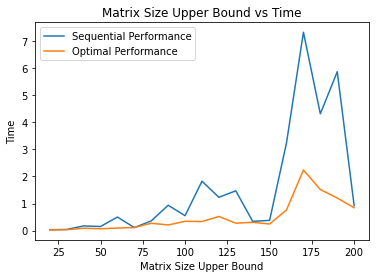

In [501]:
ub = df3["Upper Bound"]
seq = df3["Sequential Performance"]
opt = df3["Optimal Performance"]

plt.plot(ub, seq, label = "Sequential Performance")
plt.plot(ub, opt, label = "Optimal Performance")
plt.xlabel("Matrix Size Upper Bound")
plt.ylabel("Time")
plt.title("Matrix Size Upper Bound vs Time")
plt.legend()
plt.show()